In [2]:
library(rethinking)
data(Howell1)
d <- Howell1
d2 <- d[ d$age >= 18 , ]

Loading required package: cmdstanr

This is cmdstanr version 0.8.1

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /Users/rehabnaeem/.cmdstan/cmdstan-2.36.0

- CmdStan version: 2.36.0

Loading required package: posterior

This is posterior version 1.6.0.9000


Attaching package: 'posterior'


The following objects are masked from 'package:stats':

    mad, sd, var


The following objects are masked from 'package:base':

    %in%, match


Loading required package: parallel

Warning message in (function (n) :
"strings not representable in native encoding will be translated to UTF-8"
Warning message in (function (n) :
"strings not representable in native encoding will be translated to UTF-8"
Warning message in (function (n) :
"strings not representable in native encoding will be translated to UTF-8"
rethinking (Version 2.42)


Attaching package: 'rethinking'


The following object is masked from 'package:stats':

    rstudent




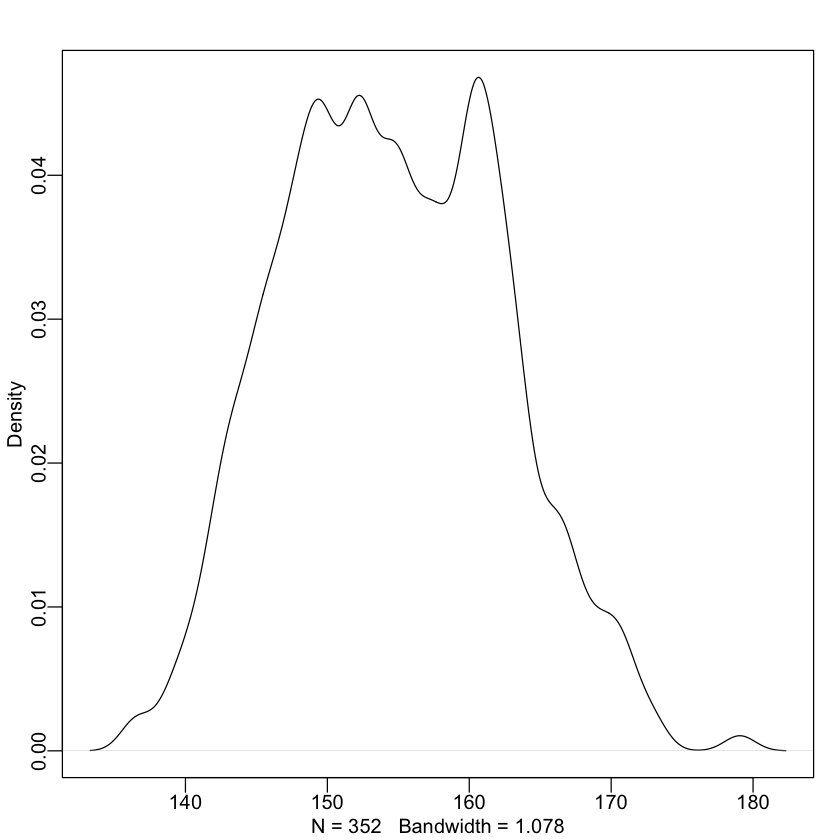

In [3]:
dens(d2$height)

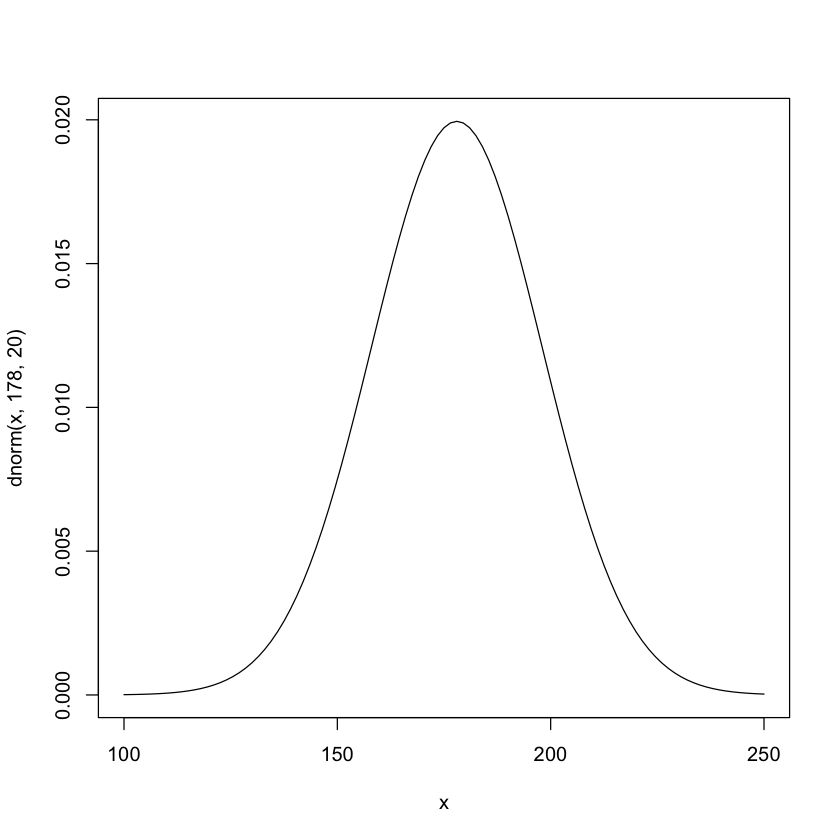

In [4]:
curve( dnorm( x , 178 , 20 ) , from=100 , to=250 )

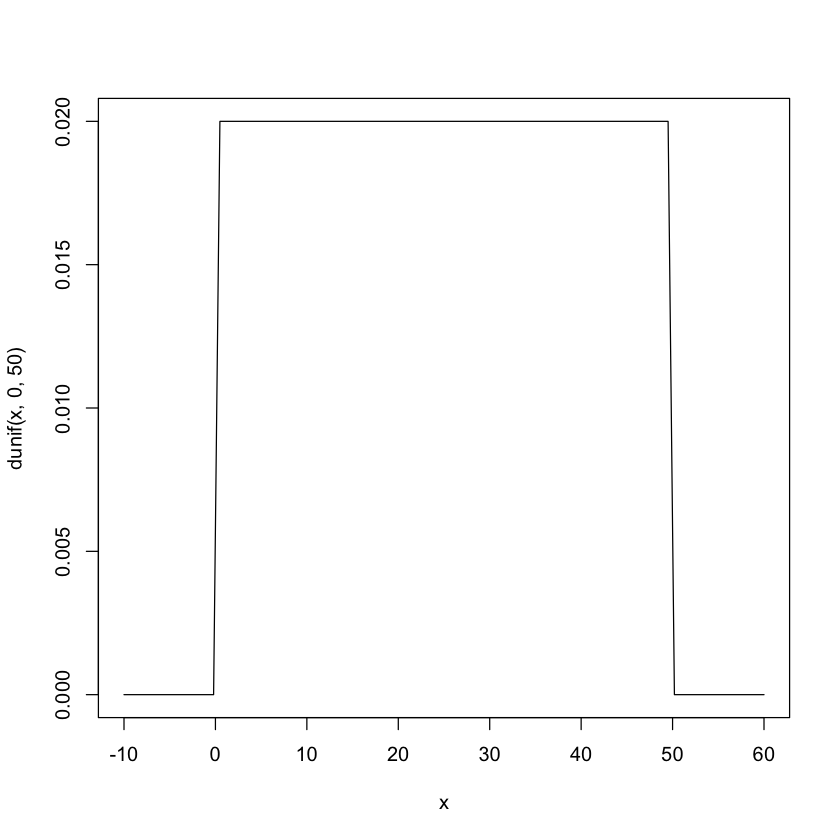

In [5]:
curve( dunif( x , 0 , 50 ) , from=-10 , to=60 )

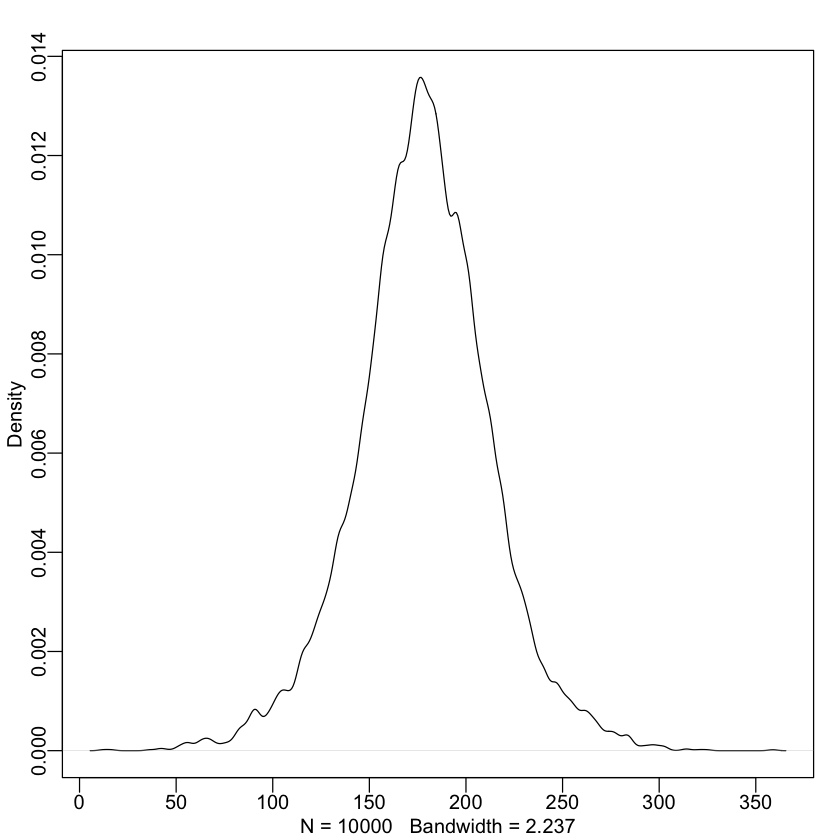

In [6]:
sample_mu <- rnorm( 1e4 , 178 , 20 )
sample_sigma <- runif( 1e4 , 0 , 50 )
prior_h <- rnorm( 1e4 , sample_mu , sample_sigma )
dens( prior_h )

In [8]:
mu.list <- seq( from=150, to=160 , length.out=100 )
sigma.list <- seq( from=7 , to=9 , length.out=100 )
post <- expand.grid( mu=mu.list , sigma=sigma.list )
post$LL <- sapply( 1:nrow(post) , function(i) sum(
dnorm( d2$height , post$mu[i] , post$sigma[i] , log=TRUE ) ) )
post$prod <- post$LL + dnorm( post$mu , 178 , 20 , TRUE ) +
dunif( post$sigma , 0 , 50 , TRUE )
post$prob <- exp( post$prod - max(post$prod) )

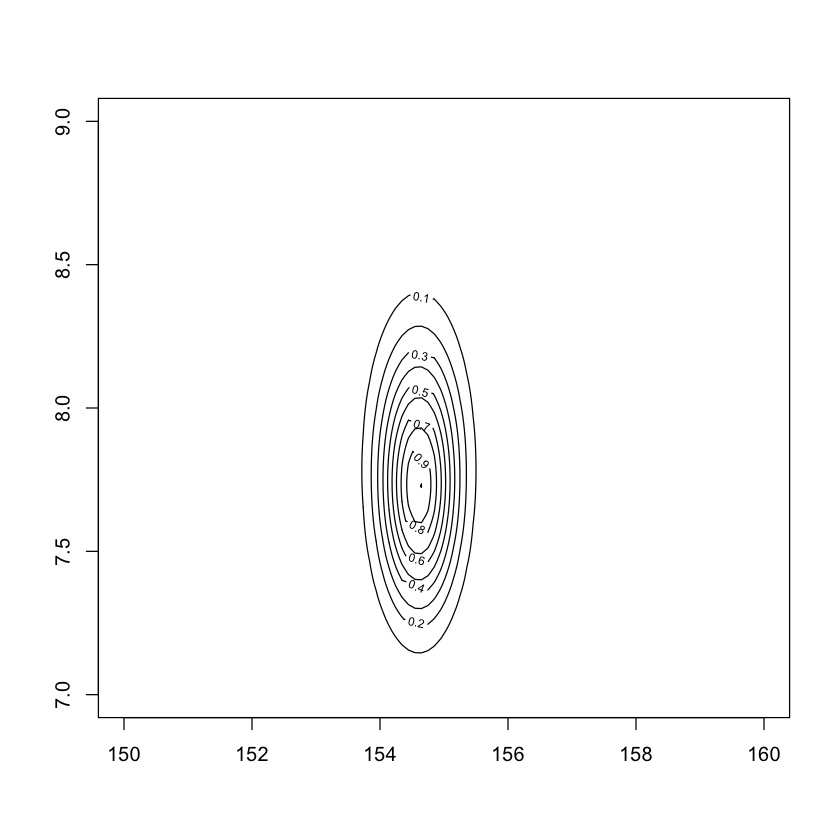

In [9]:
contour_xyz( post$mu , post$sigma , post$prob )

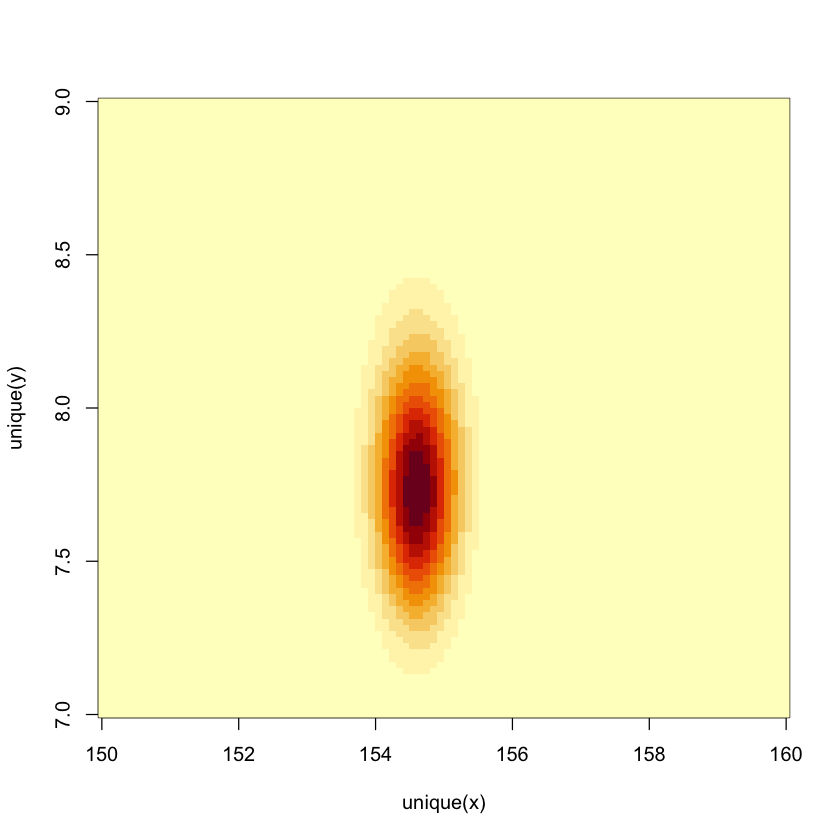

In [10]:
image_xyz( post$mu , post$sigma , post$prob )

In [13]:
post$prob

[1] 1.962639e-35 5.354162e-34 1.357374e-32 3.197901e-31 7.001443e-30
    [6] 1.424516e-28 2.693420e-27 4.732582e-26 7.727684e-25 1.172621e-23
   [11] 1.653573e-22 2.166936e-21 2.638918e-20 2.986503e-19 3.140923e-18
   [16] 3.069790e-17 2.788157e-16 2.353331e-15 1.845891e-14 1.345507e-13
   [21] 9.114301e-13 5.737436e-12 3.356367e-11 1.824644e-10 9.218160e-10
   [26] 4.327802e-09 1.888199e-08 7.655705e-08 2.884562e-07 1.010024e-06
   [31] 3.286554e-06 9.938181e-06 2.792739e-05 7.293077e-05 1.769899e-04
   [36] 3.991567e-04 8.365568e-04 1.629314e-03 2.948975e-03 4.960148e-03
   [41] 7.753100e-03 1.126194e-02 1.520227e-02 1.907044e-02 2.223157e-02
   [46] 2.408445e-02 2.424714e-02 2.268514e-02 1.972330e-02 1.593584e-02
   [51] 1.196540e-02 8.349049e-03 5.413820e-03 3.262329e-03 1.826876e-03
   [56] 9.507083e-04 4.597723e-04 2.066310e-04 8.629892e-05 3.349441e-05
   [61] 1.208082e-05 4.049281e-06 1.261295e-06 3.651003e-07 9.821213e-08
   [66] 2.455134e-08 5.703513e-09 1.231308e-09 2.470293e-10 4.605610e-11
   [71] 7.979637e-12 1.284802e-12 1.922412e-13 2.673092e-14 3.454129e-15
   [76] 4.147824e-16 4.628703e-17 4.800157e-18 4.626034e-19 4.143041e-20
   [81] 3.448156e-21 2.666931e-22 1.916875e-23 1.280363e-24 7.947477e-26
   [86] 4.584403e-27 2.457500e-28 1.224225e-29 5.667434e-31 2.438196e-32
   [91] 9.747832e-34 3.621634e-35 1.250427e-36 4.012077e-38 1.196292e-39
   [96] 3.314840e-41 8.535815e-43 2.042606e-44 4.542358e-46 9.387184e-48
  [101] 3.781089e-35 1.012124e-33 2.518780e-32 5.827565e-31 1.253499e-29
  [106] 2.506693e-28 4.660348e-27 8.055187e-26 1.294414e-24 1.933796e-23
  [111] 2.685890e-22 3.468215e-21 4.163551e-20 4.646884e-19 4.821697e-18
  [116] 4.651340e-17 4.171540e-16 3.478203e-15 2.696208e-14 1.943086e-13
  [121] 1.301880e-12 8.109419e-12 4.696224e-11 2.528412e-10 1.265573e-09
  [126] 5.889338e-09 2.547921e-08 1.024815e-07 3.832174e-07 1.332248e-06
  [131] 4.305909e-06 1.293853e-05 3.614473e-05 9.387399e-05 2.266656e-04
  [136] 5.088223e-04 1.061908e-03 2.060381e-03 3.716621e-03 6.232886e-03
  [141] 9.717851e-03 1.408612e-02 1.898247e-02 2.378231e-02 2.770101e-02
  [146] 2.999696e-02 3.019944e-02 2.826577e-02 2.459590e-02 1.989779e-02
  [151] 1.496535e-02 1.046428e-02 6.802549e-03 4.111253e-03 2.310026e-03
  [156] 1.206701e-03 5.860335e-04 2.645973e-04 1.110679e-04 4.334427e-05
  [161] 1.572588e-05 5.304427e-06 1.663420e-06 4.849598e-07 1.314466e-07
  [166] 3.312328e-08 7.759922e-09 1.690135e-09 3.422360e-10 6.442732e-11
  [171] 1.127599e-11 1.834759e-12 2.775516e-13 3.903449e-14 5.103798e-15
  [176] 6.204096e-16 7.011382e-17 7.366630e-18 7.195720e-19 6.534611e-20
  [181] 5.517030e-21 4.330430e-22 3.160071e-23 2.143891e-24 1.352225e-25
  [186] 7.929302e-27 4.322761e-28 2.190926e-29 1.032367e-30 4.522523e-32
  [191] 1.841906e-33 6.974199e-35 2.455055e-36 8.034676e-38 2.444643e-39
  [196] 6.915169e-41 1.818571e-42 4.446290e-44 1.010661e-45 2.135763e-47
  [201] 7.201525e-35 1.891810e-33 4.622234e-32 1.050384e-30 2.220064e-29
  [206] 4.364197e-28 7.979300e-27 1.356896e-25 2.146101e-24 3.157003e-23
  [211] 4.319379e-22 5.496537e-21 6.505466e-20 7.161257e-19 7.331984e-18
  [216] 6.981927e-17 6.183730e-16 5.093863e-15 3.902702e-14 2.781027e-13
  [221] 1.843174e-12 1.136185e-11 6.514080e-11 3.473591e-10 1.722764e-09
  [226] 7.946838e-09 3.409451e-08 1.360492e-07 5.049275e-07 1.742944e-06
  [231] 5.595765e-06 1.670925e-05 4.640619e-05 1.198716e-04 2.879906e-04
  [236] 6.435194e-04 1.337416e-03 2.585192e-03 4.647728e-03 7.771593e-03
  [241] 1.208651e-02 1.748289e-02 2.352052e-02 2.943081e-02 3.425144e-02
  [246] 3.707465e-02 3.732474e-02 3.494926e-02 3.043692e-02 2.465385e-02
  [251] 1.857336e-02 1.301420e-02 8.481371e-03 5.140864e-03 2.898196e-03
  [256] 1.519640e-03 7.410973e-04 3.361485e-04 1.418106e-04 5.564263e-05
  [261] 2.030617e-05 6.892393e-06 2.175872e-06 6.388786e-07 1.744716e-07
  [266] 4.431518e-08 1.046892e-08 2.300238e-09 4.700726e-10 8.934675e-11
  [271] 1.579480e-11 2.596993e-12 3.971449e-13 5.648702e-14 7.

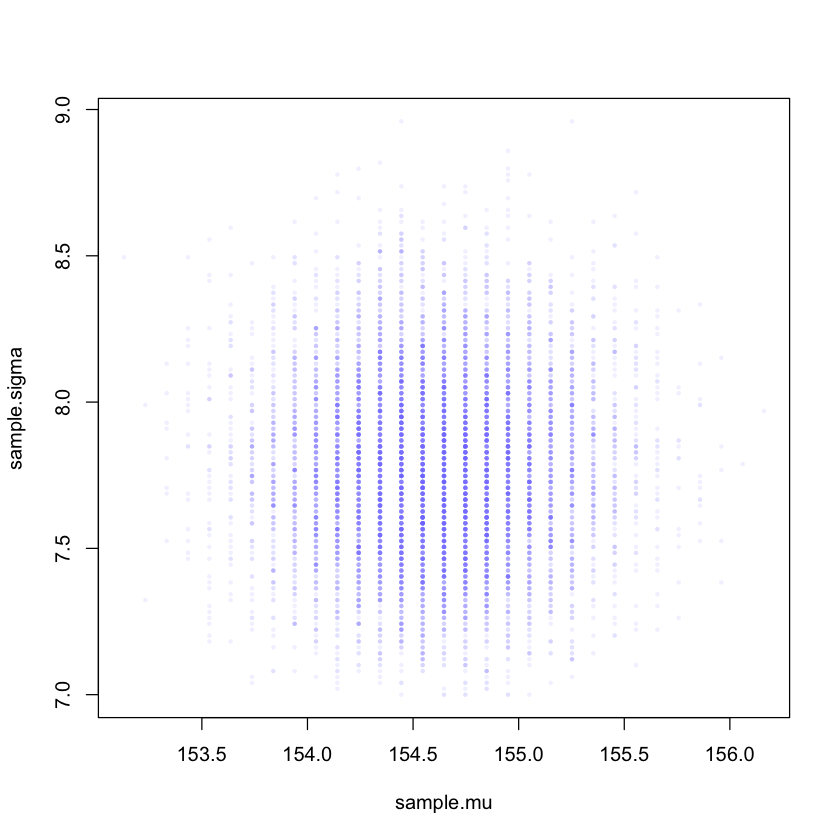

In [17]:
sample.rows <- sample( 1:nrow(post) , size=1e4 , replace=TRUE ,
prob=post$prob )
sample.mu <- post$mu[ sample.rows ]
sample.sigma <- post$sigma[ sample.rows ]

plot( sample.mu , sample.sigma , cex=0.5 , pch=16 , col=col.alpha(rangi2,0.1) )

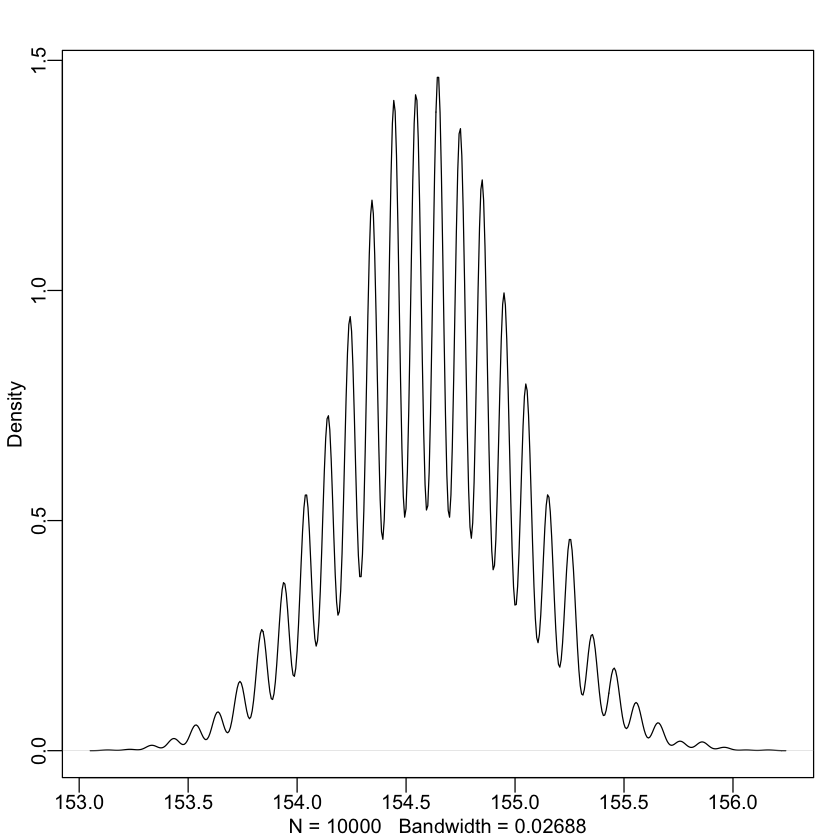

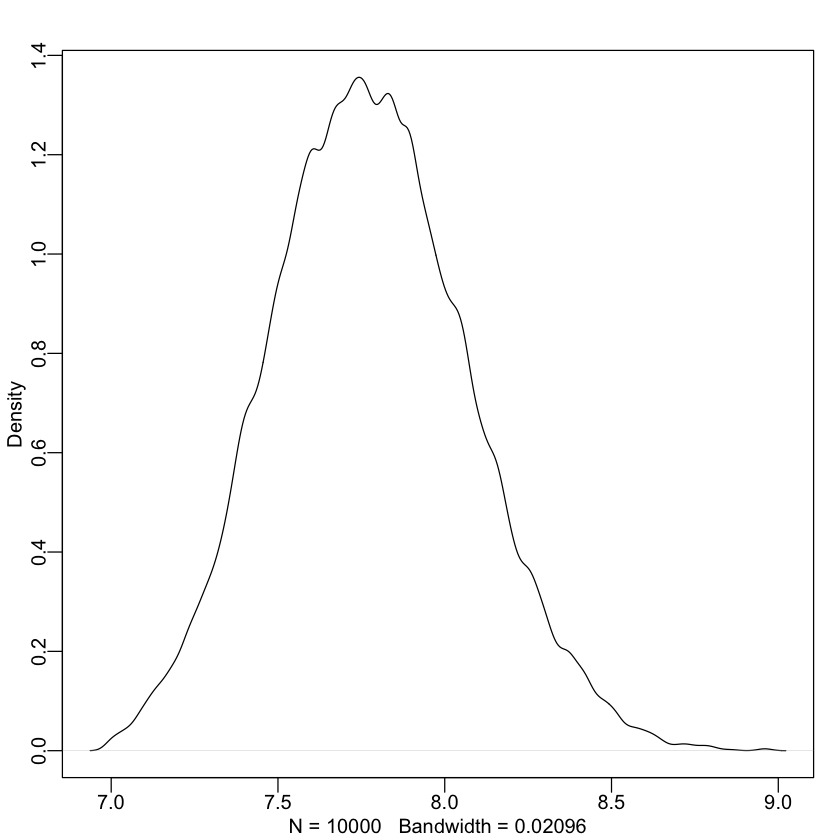

In [21]:
dens( sample.mu )
dens( sample.sigma )

In [22]:
PI( sample.mu )
PI( sample.sigma )

5%      94% 
153.9394 155.2525

5%      94% 
7.323232 8.272727

In [23]:
d3 <- sample( d2$height , size=20 )

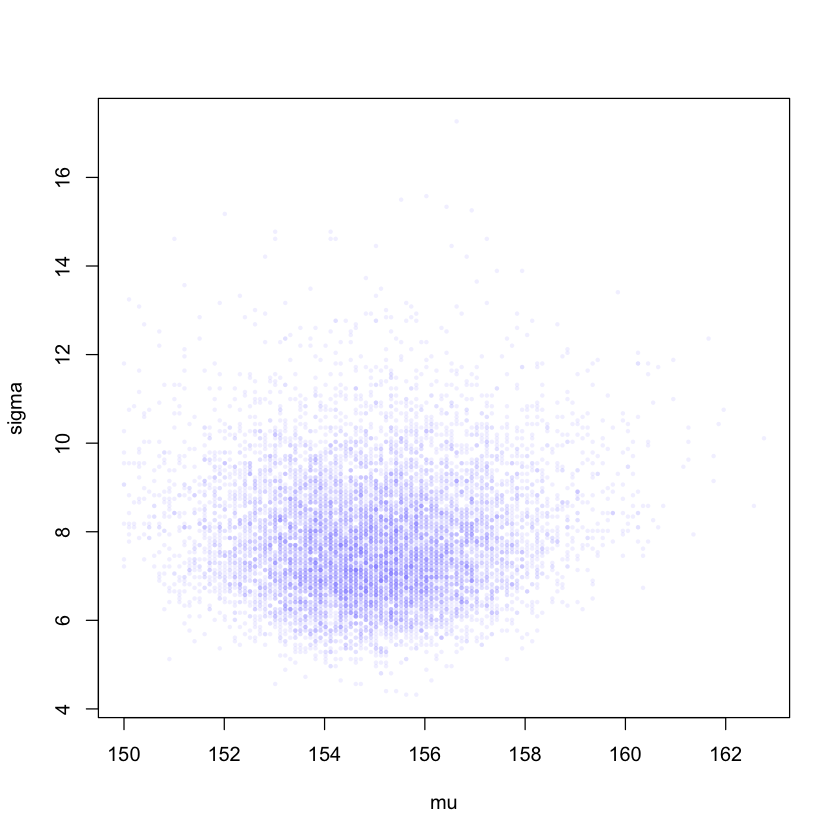

In [24]:
mu.list <- seq( from=150, to=170 , length.out=200 )
sigma.list <- seq( from=4 , to=20 , length.out=200 )
post2 <- expand.grid( mu=mu.list , sigma=sigma.list )
post2$LL <- sapply( 1:nrow(post2) , function(i)
sum( dnorm( d3 , mean=post2$mu[i] , sd=post2$sigma[i] ,
log=TRUE ) ) )
post2$prod <- post2$LL + dnorm( post2$mu , 178 , 20 , TRUE ) +
dunif( post2$sigma , 0 , 50 , TRUE )
post2$prob <- exp( post2$prod - max(post2$prod) )
sample2.rows <- sample( 1:nrow(post2) , size=1e4 , replace=TRUE ,
prob=post2$prob )
sample2.mu <- post2$mu[ sample2.rows ]
sample2.sigma <- post2$sigma[ sample2.rows ]
plot( sample2.mu , sample2.sigma , cex=0.5 ,
col=col.alpha(rangi2,0.1) ,
xlab="mu" , ylab="sigma" , pch=16 )

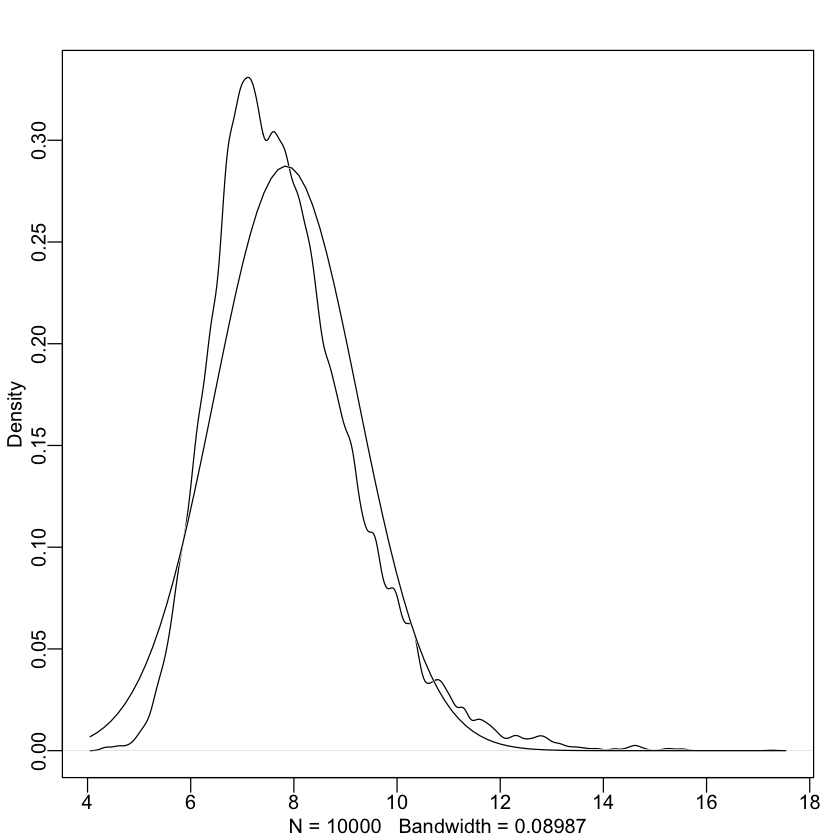

In [26]:
dens( sample2.sigma , norm.comp=TRUE )

In [46]:
flist <- alist(
height ~ dnorm( mu , sigma ) ,
mu ~ dnorm( 178 , 20 ) ,
sigma ~ dunif( 0 , 50 )
)

m4.1 <- quap( flist , data=d2 )

precis( m4.1 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,154.606650,0.4119819,153.948223,155.265076
sigma,7.731094,0.2913635,7.265439,8.196749
